<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Exploration" data-toc-modified-id="Exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration</a></span></li><li><span><a href="#Hypothesis-Testing" data-toc-modified-id="Hypothesis-Testing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hypothesis Testing</a></span></li><li><span><a href="#Supervised-Modeling" data-toc-modified-id="Supervised-Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Supervised Modeling</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span></li><li><span><a href="#Pycaret-Classification" data-toc-modified-id="Pycaret-Classification-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pycaret Classification</a></span></li></ul></div>

# Intro

In [1]:
import getpass
import pymysql
from sqlalchemy import create_engine

In [15]:
Hostname='34.105.211.16'
username='student'
password=getpass.getpass()

 ········


In [16]:
eng=create_engine(f'mysql+pymysql://{username}:{password}@{Hostname}:3306/vivino_db')

In [4]:
import pandas as pd

In [5]:
from sqlalchemy import inspect

In [18]:
inspect(eng).get_table_names()

['acidity',
 'appelations',
 'body',
 'countries',
 'critics',
 'grapes',
 'meat_info',
 'meat_wine',
 'merchants',
 'prices',
 'regions',
 'vintages',
 'wine',
 'wine_grapes',
 'winery']

In [20]:
df=pd.read_sql_table('wine',eng)

In [21]:
df.head()

,vintage_id,name,certified_biodynamic,wine_id,wine_name,type,is_natural,region_id,country,winery_id,...,vintage_rank_percentile_country,vintage_rank_percentile_region,vintage_rank_percentile_winery,vintage_rank_percentile_global,contains_added_sulfites,contains_milk_allergens,contains_egg_allergens,closure,year,median_price
0,14201617,Marqués de Riscal Rioja Reserva 2015,0.0,1163903,Rioja Reserva,Red,0,492.0,Espagne,1837,...,1.31,1.73,5.38,1.52,1.0,0.0,0.0,cork,2015.0,23.33
1,150296971,Catena Malbec 2017,0.0,1873,Malbec,Red,0,454.0,Argentine,243362,...,2.19,2.39,3.14,1.52,1.0,0.0,0.0,None,2017.0,17.90
2,164942685,Opus One Overture N.V.,0.0,4848,Overture,Red,0,25.0,États-Unis,1368,...,0.55,7.85,30.53,0.18,1.0,0.0,0.0,None,NaN,190.00
3,14152059,E. Guigal Côtes-du-Rhône Rouge 2015,0.0,7773,Côtes-du-Rhône Rouge,Red,0,429.0,France,1314,...,8.40,17.57,37.25,8.75,1.0,0.0,0.0,None,2015.0,10.50
4,85846548,Mouton Cadet Bordeaux Rouge 2016,0.0,4113,Bordeaux Rouge,Red,0,383.0,France,139072,...,14.67,13.06,18.26,15.06,1.0,0.0,0.0,None,2016.0,18.59


In [22]:
df.shape

(3600, 43)

In [24]:
df.isna().sum()

vintage_id                            0
name                                  0
certified_biodynamic               3051
wine_id                               0
wine_name                             0
type                                  0
is_natural                            0
region_id                             1
country                               1
winery_id                             0
rank_percentile_country               0
rank_percentile_region                0
rank_percentile_winery                0
rank_percentile_wine_type             0
rank_percentile_global                0
wine_description                   1461
alcohol                             614
appelation_id                        41
body_id                              41
acidity_id                           41
awards_number                         0
awards_bronze_number                  0
awards_silver_number                  0
awards_gold_number                    0
awards_excellent_number               0


We are studying French wine only for the sake of homosedasticity

In [27]:
df=df.query('country=="France"').copy()

In [28]:
df.shape

(2732, 43)

In [29]:
df.isna().sum()

vintage_id                            0
name                                  0
certified_biodynamic               2496
wine_id                               0
wine_name                             0
type                                  0
is_natural                            0
region_id                             0
country                               0
winery_id                             0
rank_percentile_country               0
rank_percentile_region                0
rank_percentile_winery                0
rank_percentile_wine_type             0
rank_percentile_global                0
wine_description                   1328
alcohol                             597
appelation_id                        25
body_id                              25
acidity_id                           25
awards_number                         0
awards_bronze_number                  0
awards_silver_number                  0
awards_gold_number                    0
awards_excellent_number               0


In [31]:
df.drop('wine_description', axis=1, inplace=True)

In [34]:
df.certified_biodynamic.fillna(0, inplace=True)

In [36]:
df.alcohol.describe()

count    2135.000000
mean       13.289208
std         0.683246
min        10.000000
25%        13.000000
50%        13.000000
75%        13.500000
max        16.000000
Name: alcohol, dtype: float64

In [40]:
df.alcohol.fillna(df.alcohol.mean(), inplace=True)

In [43]:
df.drop('appelation_id', axis=1, inplace=True)

In [51]:
df.drop(df[df.body_id.isna()].index, inplace=True)

In [53]:
df.isna().sum()

vintage_id                            0
name                                  0
certified_biodynamic                  0
wine_id                               0
wine_name                             0
type                                  0
is_natural                            0
region_id                             0
country                               0
winery_id                             0
rank_percentile_country               0
rank_percentile_region                0
rank_percentile_winery                0
rank_percentile_wine_type             0
rank_percentile_global                0
alcohol                               0
body_id                               0
acidity_id                            0
awards_number                         0
awards_bronze_number                  0
awards_silver_number                  0
awards_gold_number                    0
awards_excellent_number               0
awards_platinum_number                0
awards_remarkable_number              0


In [54]:
df.closure.unique()

array([None, 'cork', 'screw'], dtype=object)

In [55]:
df.closure.value_counts()

cork     19
screw     1
Name: closure, dtype: int64

In [56]:
df.drop('closure', axis=1, inplace=True)

In [57]:
df.contains_added_sulfites.unique()

array([ 1., nan])

In [58]:
df.contains_added_sulfites.fillna(0,
    inplace=True)

In [60]:
df.contains_milk_allergens.fillna(0,
    inplace=True)

In [61]:
df.contains_egg_allergens.fillna(0,
    inplace=True)

In [63]:
df.columns

Index(['vintage_id', 'name', 'certified_biodynamic', 'wine_id', 'wine_name',
       'type', 'is_natural', 'region_id', 'country', 'winery_id',
       'rank_percentile_country', 'rank_percentile_region',
       'rank_percentile_winery', 'rank_percentile_wine_type',
       'rank_percentile_global', 'alcohol', 'body_id', 'acidity_id',
       'awards_number', 'awards_bronze_number', 'awards_silver_number',
       'awards_gold_number', 'awards_excellent_number',
       'awards_platinum_number', 'awards_remarkable_number',
       'awards_commended_number', 'ratings_distribution_1',
       'ratings_distribution_2', 'ratings_distribution_3',
       'ratings_distribution_4', 'ratings_distribution_5',
       'vintage_rank_percentile_country', 'vintage_rank_percentile_region',
       'vintage_rank_percentile_winery', 'vintage_rank_percentile_global',
       'contains_added_sulfites', 'contains_milk_allergens',
       'contains_egg_allergens', 'year', 'median_price'],
      dtype='object')

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.shape

(1488, 40)

In [69]:
df.vintage_id.nunique()==df.shape[0]

False

In [70]:
df.vintage_id.nunique()

1486

In [73]:
df.vintage_id.duplicated()

3       False
4       False
37      False
41      False
61      False
        ...  
2022    False
2023    False
2024    False
3533     True
3570     True
Name: vintage_id, Length: 1488, dtype: bool

In [80]:
df.loc[df.vintage_id.isin(df.vintage_id.iloc[-2:]), ['region_id','winery_id','year']]

,region_id,winery_id,year
2008,393.0,1367,2014.0
2020,399.0,177327,2015.0
3533,393.0,1367,2014.0
3570,399.0,177327,2015.0


In [85]:
df.loc[df.vintage_id.isin(df.vintage_id.iloc[-2:])].apply(pd.Series.duplicated).sum()

vintage_id                         2
name                               2
certified_biodynamic               3
wine_id                            2
wine_name                          2
type                               3
is_natural                         3
region_id                          2
country                            3
winery_id                          2
rank_percentile_country            2
rank_percentile_region             2
rank_percentile_winery             2
rank_percentile_wine_type          2
rank_percentile_global             2
alcohol                            2
body_id                            3
acidity_id                         3
awards_number                      3
awards_bronze_number               3
awards_silver_number               3
awards_gold_number                 3
awards_excellent_number            3
awards_platinum_number             3
awards_remarkable_number           3
awards_commended_number            3
ratings_distribution_1             3
r

In [95]:
df=df.iloc[:-2].copy()

In [96]:
df.vintage_id.nunique()==df.shape[0]

AttributeError: 'DataFrame' object has no attribute 'vintage_id'

In [97]:
df.columns

Index(['certified_biodynamic', 'type', 'is_natural', 'region_id',
       'rank_percentile_country', 'rank_percentile_region',
       'rank_percentile_winery', 'rank_percentile_wine_type',
       'rank_percentile_global', 'alcohol', 'body_id', 'acidity_id',
       'awards_number', 'awards_bronze_number', 'awards_silver_number',
       'awards_gold_number', 'awards_excellent_number',
       'awards_platinum_number', 'awards_remarkable_number',
       'awards_commended_number', 'ratings_distribution_1',
       'ratings_distribution_2', 'ratings_distribution_3',
       'ratings_distribution_4', 'ratings_distribution_5',
       'vintage_rank_percentile_country', 'vintage_rank_percentile_region',
       'vintage_rank_percentile_winery', 'vintage_rank_percentile_global',
       'contains_added_sulfites', 'contains_milk_allergens',
       'contains_egg_allergens', 'year', 'median_price'],
      dtype='object')

In [98]:
df.drop(['vintage_id', 'name','wine_id','wine_name', 'country','winery_id'], axis=1, inplace=True)

KeyError: "['vintage_id' 'name' 'wine_id' 'wine_name' 'country' 'winery_id'] not found in axis"

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484 entries, 3 to 2022
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   certified_biodynamic             1484 non-null   float64
 1   type                             1484 non-null   object 
 2   is_natural                       1484 non-null   int64  
 3   region_id                        1484 non-null   float64
 4   rank_percentile_country          1484 non-null   float64
 5   rank_percentile_region           1484 non-null   float64
 6   rank_percentile_winery           1484 non-null   float64
 7   rank_percentile_wine_type        1484 non-null   float64
 8   rank_percentile_global           1484 non-null   float64
 9   alcohol                          1484 non-null   float64
 10  body_id                          1484 non-null   float64
 11  acidity_id                       1484 non-null   float64
 12  awards_number       

# Exploration

In [105]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


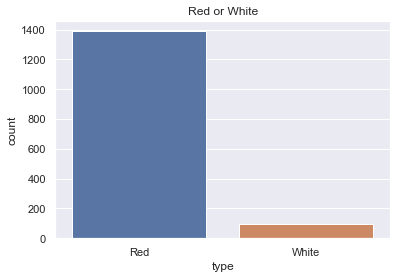

In [108]:
sns.countplot(data=df, x='type')
plt.title('Red or White')
plt.show()

In [117]:
df.eval('certified_biodynamic ==1 | is_natural==1').astype(int)

3       0
4       0
37      0
41      0
61      0
       ..
2018    0
2019    0
2020    0
2021    0
2022    0
Length: 1484, dtype: int64

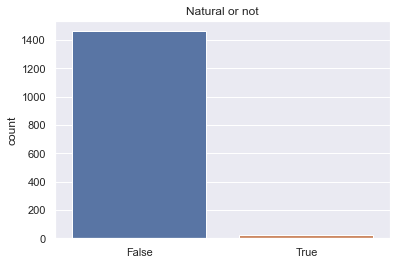

In [120]:
sns.countplot(x=df.eval('certified_biodynamic ==1 | is_natural==1'))
plt.title('Natural or not')
plt.show()

In [123]:
df.corr().median_price.sort_values()

rank_percentile_global            -0.638740
rank_percentile_wine_type         -0.635910
rank_percentile_country           -0.629235
year                              -0.627137
vintage_rank_percentile_global    -0.616128
vintage_rank_percentile_country   -0.603251
rank_percentile_region            -0.475195
vintage_rank_percentile_region    -0.424662
ratings_distribution_3            -0.297569
vintage_rank_percentile_winery    -0.274727
ratings_distribution_2            -0.219896
region_id                         -0.183059
rank_percentile_winery            -0.176246
awards_number                     -0.138076
contains_added_sulfites           -0.111712
awards_bronze_number              -0.093758
awards_commended_number           -0.084192
awards_excellent_number           -0.069891
contains_egg_allergens            -0.066720
contains_milk_allergens           -0.065095
ratings_distribution_1            -0.060719
awards_silver_number              -0.057617
is_natural                      

In [128]:
df['rating_average']=df.eval('ratings_distribution_1+ratings_distribution_2*2+ratings_distribution_3*3+ratings_distribution_4*4+ratings_distribution_5*5')/df.loc[:,'ratings_distribution_1':'ratings_distribution_5'].sum(axis=1)

<AxesSubplot:>

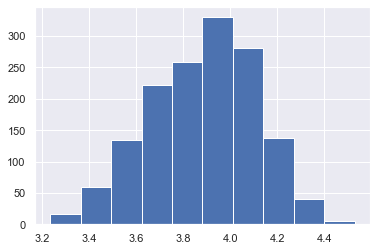

In [130]:
df.rating_average.hist()

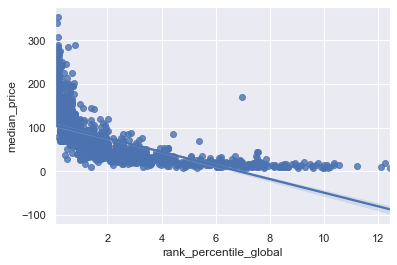

In [125]:
sns.regplot(data=df, x='rank_percentile_global', y='median_price')
plt.show()

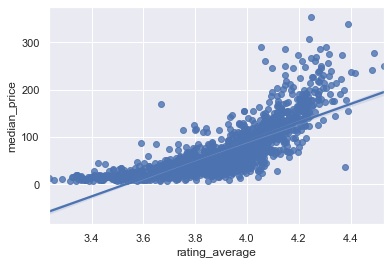

In [131]:
sns.regplot(data=df, x='rating_average', y='median_price')
plt.show()

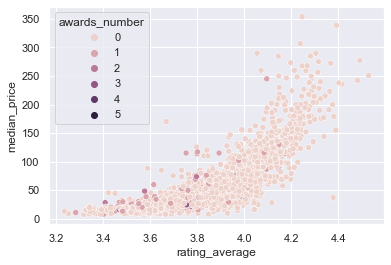

In [135]:
sns.scatterplot(data=df, x='rating_average', y='median_price', hue='awards_number')
plt.show()

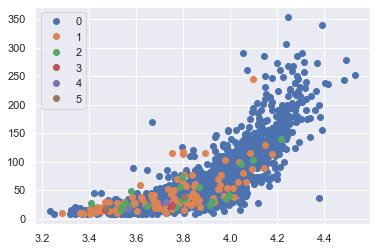

In [138]:
groups=df.groupby('awards_number')
for name, group in groups:
    plt.plot(group.rating_average, group.median_price, marker='o', linestyle='', label=name)
plt.legend()
plt.show()

(array([635., 364., 200., 134.,  77.,  33.,  23.,  11.,   5.,   2.]),
 array([  7.44 ,  42.096,  76.752, 111.408, 146.064, 180.72 , 215.376,
        250.032, 284.688, 319.344, 354.   ]),
 <BarContainer object of 10 artists>)

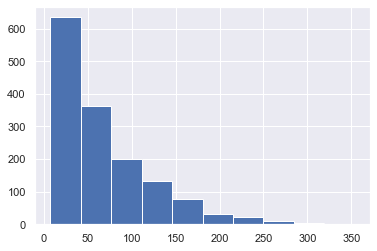

In [139]:
plt.hist(df.median_price)

<AxesSubplot:xlabel='year', ylabel='median_price'>

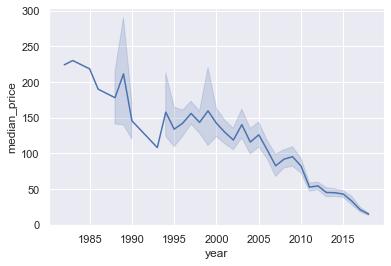

In [141]:
sns.lineplot(data=df, x='year', y='median_price')

<AxesSubplot:xlabel='awards_number', ylabel='rating_average'>

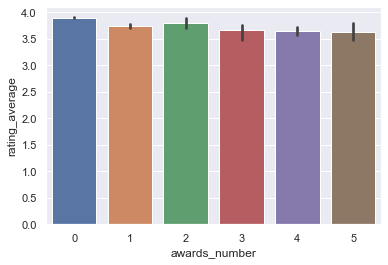

In [143]:
sns.barplot(data=df, x='awards_number', y='rating_average')

<AxesSubplot:xlabel='awards_number', ylabel='median_price'>

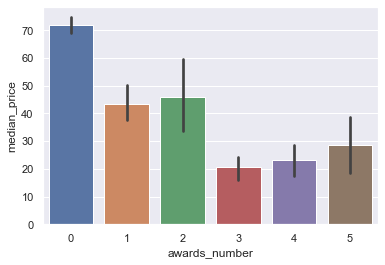

In [144]:
sns.barplot(data=df, x='awards_number', y='median_price')

In [154]:
df.loc[df.eval('certified_biodynamic ==1 | is_natural==1'), 'body_id'].value_counts(normalize=True)

4.0    0.476190
3.0    0.333333
5.0    0.190476
Name: body_id, dtype: float64

In [155]:
df.loc[~df.eval('certified_biodynamic ==1 | is_natural==1'), 'body_id'].value_counts(normalize=True)

4.0    0.928913
5.0    0.041695
3.0    0.023240
2.0    0.006152
Name: body_id, dtype: float64

In [156]:
df.loc[df.eval('certified_biodynamic ==1 | is_natural==1'), 'acidity_id'].value_counts(normalize=True)

3.0    0.904762
2.0    0.095238
Name: acidity_id, dtype: float64

In [157]:
df.loc[~df.eval('certified_biodynamic ==1 | is_natural==1'), 'acidity_id'].value_counts(normalize=True)

3.0    0.829802
2.0    0.168148
1.0    0.002051
Name: acidity_id, dtype: float64

Check whether average acidity of natural wine is the same as acidity of conventional wine

# Hypothesis Testing

In [158]:
from scipy.stats import ttest_ind

In [159]:
ttest_ind(df.loc[df.eval('certified_biodynamic ==1 | is_natural==1'), 'acidity_id'], df.loc[~df.eval('certified_biodynamic ==1 | is_natural==1'), 'acidity_id'])

Ttest_indResult(statistic=0.9169773702623475, pvalue=0.3593036927023686)

In [163]:
p1=df.loc[df.eval('(certified_biodynamic ==1 | is_natural==1)& acidity_id==3'), 'acidity_id'].shape[0]
n1=df.loc[df.eval('(certified_biodynamic ==1 | is_natural==1)'), 'acidity_id'].shape[0]


p2=df.loc[df.eval(' certified_biodynamic ==0 & is_natural==0 & acidity_id==3'), 'acidity_id'].shape[0]
n2=df.loc[df.eval('(certified_biodynamic ==0 & is_natural==0)'), 'acidity_id'].shape[0]

In [164]:
p1,n1

(19, 21)

In [165]:
p2,n2

(1214, 1463)

In [174]:
sample1=(df[df.eval('(certified_biodynamic ==1 | is_natural==1)')].acidity_id==3).to_list()
sample2=(df[~df.eval('(certified_biodynamic ==1 | is_natural==1)')].acidity_id==3).to_list()

In [178]:
ttest_ind(sample1,sample2)

Ttest_indResult(statistic=0.9094712846424361, pvalue=0.36324928994322114)

After performing ttest of proportions of 'Élevée' wines we conclude that there is no statistically significant difference between natural and conventional wine. Even though there is an absolute difference of 8%

# Supervised Modeling

In [179]:
X=df.drop('median_price', axis=1)
y=df.median_price

In [182]:
X.type=X.type.map({'Red':0, 'White':1})

In [186]:
X.region_id.nunique()

90

In [187]:
X.region_id.value_counts()

399.0     210
393.0     193
384.0     172
456.0     133
471.0     122
         ... 
2402.0      1
3644.0      1
777.0       1
3246.0      1
3251.0      1
Name: region_id, Length: 90, dtype: int64

In [188]:
X.columns

Index(['certified_biodynamic', 'type', 'is_natural', 'region_id',
       'rank_percentile_country', 'rank_percentile_region',
       'rank_percentile_winery', 'rank_percentile_wine_type',
       'rank_percentile_global', 'alcohol', 'body_id', 'acidity_id',
       'awards_number', 'awards_bronze_number', 'awards_silver_number',
       'awards_gold_number', 'awards_excellent_number',
       'awards_platinum_number', 'awards_remarkable_number',
       'awards_commended_number', 'ratings_distribution_1',
       'ratings_distribution_2', 'ratings_distribution_3',
       'ratings_distribution_4', 'ratings_distribution_5',
       'vintage_rank_percentile_country', 'vintage_rank_percentile_region',
       'vintage_rank_percentile_winery', 'vintage_rank_percentile_global',
       'contains_added_sulfites', 'contains_milk_allergens',
       'contains_egg_allergens', 'year', 'rating_average'],
      dtype='object')

I want to launch my own winery and produce the most expensive wine. What should I do to make it happen? What parameters I need to play around?

# Modeling

In [190]:
X.drop(['rating_average','vintage_rank_percentile_global','vintage_rank_percentile_country', 'vintage_rank_percentile_region','vintage_rank_percentile_winery', 'ratings_distribution_1',
       'ratings_distribution_2', 'ratings_distribution_3',
       'ratings_distribution_4', 'ratings_distribution_5', 'awards_number', 'awards_bronze_number', 'awards_silver_number',
       'awards_gold_number', 'awards_excellent_number',
       'awards_platinum_number', 'awards_remarkable_number',
       'awards_commended_number','rank_percentile_country', 'rank_percentile_region',
       'rank_percentile_winery', 'rank_percentile_wine_type',
       'rank_percentile_global'],axis=1,inplace=True)

In [191]:
X.shape

(1484, 11)

In [192]:
X.columns

Index(['certified_biodynamic', 'type', 'is_natural', 'region_id', 'alcohol',
       'body_id', 'acidity_id', 'contains_added_sulfites',
       'contains_milk_allergens', 'contains_egg_allergens', 'year'],
      dtype='object')

In [202]:
regions_to_dummy=X.region_id.value_counts(normalize=True)[X.region_id.value_counts(normalize=True)>0.07].index

In [203]:
X1=X.copy()

In [205]:
for i in regions_to_dummy:
    X['region_'+str(i)]=X.region_id.map(lambda x: 1 if x==i else 0)

In [207]:
X.drop('region_id',axis=1,inplace=True)

In [213]:
import numpy as np
y1=y.map(np.log).copy()

In [215]:
from statsmodels.api import OLS, add_constant

In [220]:
OLS(y1,add_constant(X.drop(['contains_egg_allergens','region_427.0','certified_biodynamic'],axis=1))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     163.2
Date:                Thu, 15 Oct 2020   Prob (F-statistic):          6.53e-287
Time:                        16:00:30   Log-Likelihood:                -1089.0
No. Observations:                1484   AIC:                             2208.
Df Residuals:                    1469   BIC:                             2288.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     171.4951      5.880     29.165      0.000     159.961     183.030
type                        0.1977      0.059      3.336      0.001       0.081       0.314
is_natural                  0.3728      0.144      2.590      0.010       0.090       0.655
alcohol                     0.0857      0.024      3.602      0.000       0.039       0.132
body_id                     0.1172      0.045      2.616      0.009       0.029       0.205
acidity_id                 -0.5451      0.049    -11.071      0.000      -0.642      -0.449
contains_added_sulfites     0.1321      0.034      3.850      0.000       0.065       0.199
contains_milk_allergens     0.1132      0.046      2.480      0.013       0.024       0.203
year                       -0.0836      0.003    -28.516      0.000      -0.089      -0.078
region_399.0                0.7710      0.047     16.346      0.000       0.678       0.863
region_393.0                0.9627      0.047     20.315      0.000       0.870       1.056
region_384.0                0.7792      0.048     16.231      0.000       0.685       0.873
region_456.0                0.6188      0.053     11.605      0.000       0.514       0.723
region_471.0                0.7896      0.053     14.802      0.000       0.685       0.894
region_827.0                0.1734      0.065      2.656      0.008       0.045       0.301
==============================================================================
Omnibus:                       52.152   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.978
Skew:                           0.442   Prob(JB):                     2.57e-13
Kurtosis:                       3.395   Cond. No.                     8.99e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.99e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [221]:
from Assumptions import Assumption_Tester_OLS as ast

In [224]:
tester=ast(X.drop(['contains_egg_allergens','region_427.0','certified_biodynamic'],axis=1),y1)

Fitting linear regression

R^2: 0.6086301417560137 

Coefficients
-------------------------------------
Intercept: 171.49507539993692
type: 0.2
is_natural: 0.37
alcohol: 0.09
body_id: 0.12
acidity_id: -0.55
contains_added_sulfites: 0.13
contains_milk_allergens: 0.11
year: -0.08
region_399.0: 0.77
region_393.0: 0.96
region_384.0: 0.78
region_456.0: 0.62
region_471.0: 0.79
region_827.0: 0.17

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/home/mauritian/yes/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


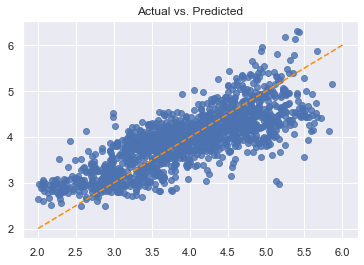

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with median_price


alcohol       0.000536
body_id       0.098352
acidity_id   -0.005861
Name: median_price, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with median_price


year   -0.653383
Name: median_price, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


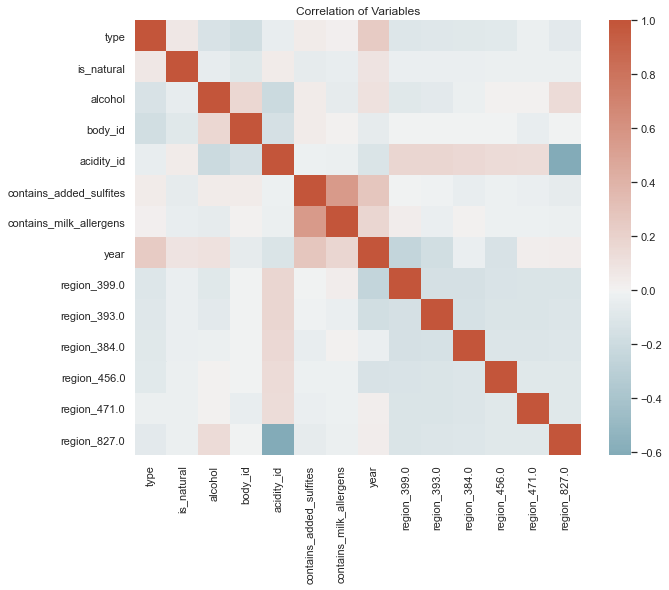

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
year: 904.8332923048405
alcohol: 576.0112672154429
body_id: 185.46695783248194
acidity_id: 114.14578902717307
contains_added_sulfites: 2.2830879301134854
region_827.0: 1.8059896839626488
contains_milk_allergens: 1.7156055127248022
region_399.0: 1.623356245254945
region_393.0: 1.5690185442833309
region_384.0: 1.5102456603194796
region_456.0: 1.3904186228732813
region_471.0: 1.3416576879660744
type: 1.2626975612540587
is_natural: 1.0457734106606715

4 cases of possible multicollinearity
4 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in th

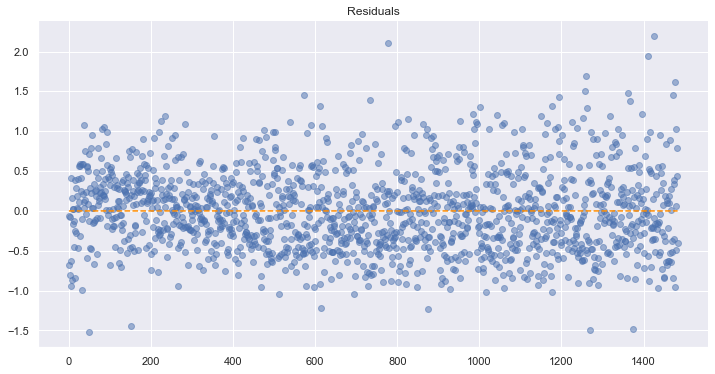

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 467.5618449097602,
 'pvalue for LM': 1.1213981682990921e-91,
 'F stats': 48.30003032616012,
 'pvalue for Fstats': 3.5606100809758057e-110}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 6.898502015057653e-10
Residuals are not normally distributed


/home/mauritian/yes/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


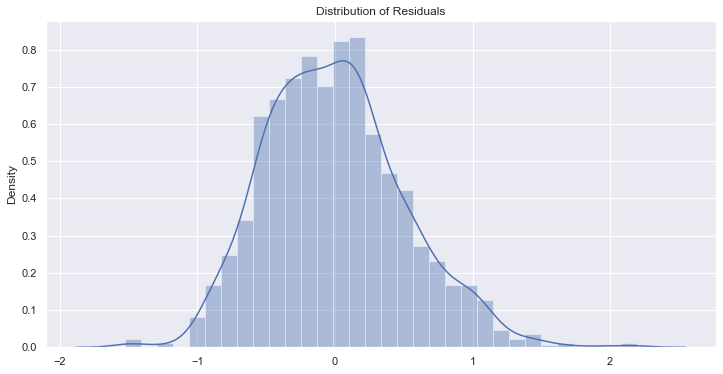


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


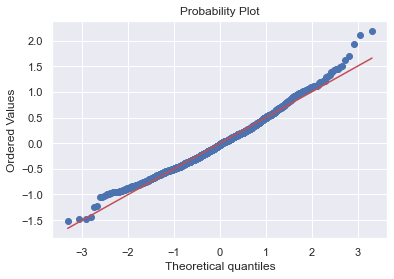


In your dataset you quite fat tails. You have 0.038 potential outliers (57 rows)


{'Satisfied': ['Autocorrelation'],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Multicollinearity', 'Normality']}

In [225]:
tester.run_all()

In [227]:
X.year=2020-X.year

In [232]:
tester=ast(X.drop(['contains_egg_allergens','region_427.0','certified_biodynamic','alcohol','acidity_id'],axis=1),y1)

Fitting linear regression

R^2: 0.5696522907481036 

Coefficients
-------------------------------------
Intercept: 1.7292345942813747
type: 0.18
is_natural: 0.24
body_id: 0.23
contains_added_sulfites: 0.14
contains_milk_allergens: 0.12
year: 0.08
region_399.0: 0.61
region_393.0: 0.8
region_384.0: 0.62
region_456.0: 0.47
region_471.0: 0.65
region_827.0: 0.6

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/home/mauritian/yes/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


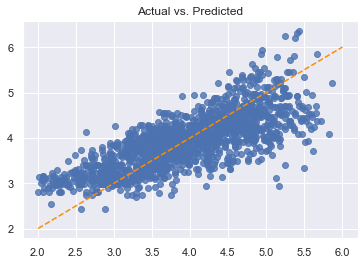

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with median_price


body_id    0.098352
Name: median_price, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with median_price


year    0.653383
Name: median_price, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


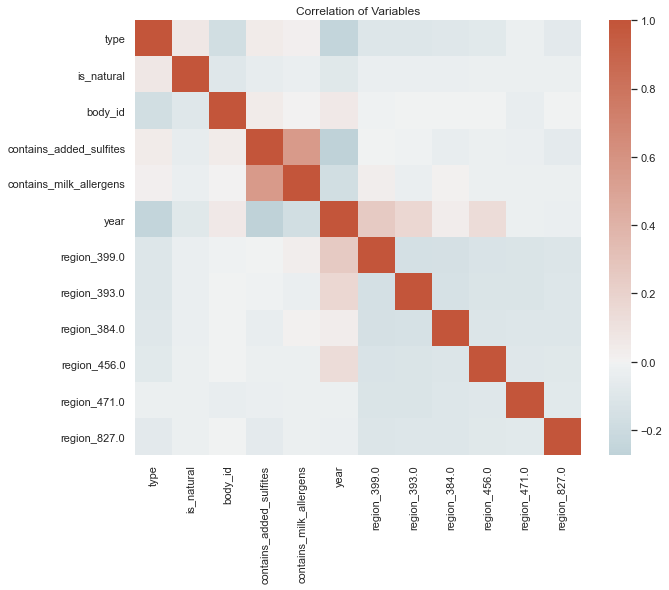

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
body_id: 7.324942209377712
year: 5.751603760789426
contains_added_sulfites: 2.379975163640536
contains_milk_allergens: 1.6979434945733234
region_399.0: 1.6455222321552154
region_393.0: 1.5304187704384655
region_384.0: 1.405591774554936
region_456.0: 1.3647561501275807
region_471.0: 1.2509298759631842
region_827.0: 1.2429826603718366
type: 1.1791139820618417
is_natural: 1.0282501980746281

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.027351422171609
Little to no autocorrelation 

Assum

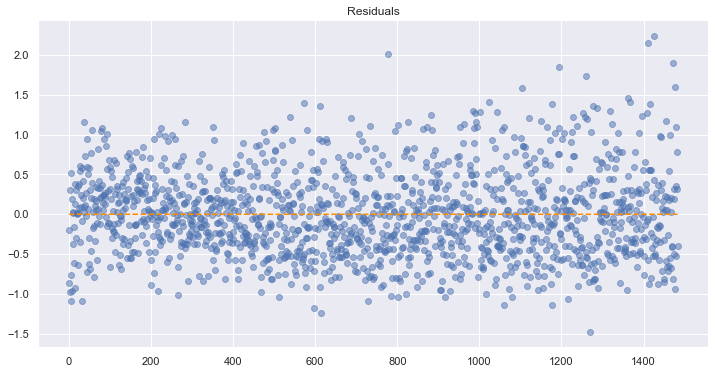

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 451.70019975857207,
 'pvalue for LM': 6.260131434085527e-90,
 'F stats': 53.67487024999219,
 'pvalue for Fstats': 4.7166451376055236e-107}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 2.3776099449280895e-13
Residuals are not normally distributed


/home/mauritian/yes/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


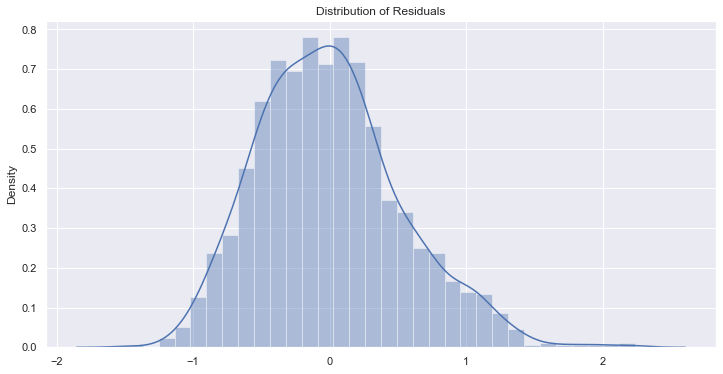


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


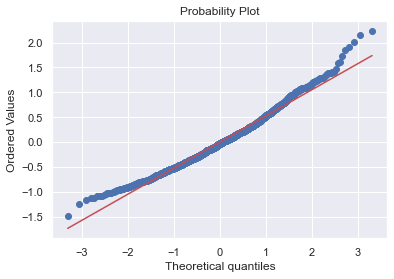


In your dataset you quite fat tails. You have 0.032 potential outliers (47 rows)


{'Satisfied': ['Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [233]:
tester.run_all()

In [236]:
tester.predictions

array([3.21038005, 3.12631317, 3.12631317, ..., 3.81835121, 2.98242225,
       5.04500176])

In [235]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [237]:
mean_absolute_error(y1, tester.predictions)

0.4172146252987165

In [238]:
mean_squared_error(y1, tester.predictions)

0.279366343567904

In [239]:
from sklearn.ensemble import RandomForestRegressor

In [240]:
model=RandomForestRegressor()

In [255]:
model.fit(X1,y1)

RandomForestRegressor()

In [256]:
mean_absolute_error(y1, model.predict(X1))

0.21378007605787921

In [258]:
mean_squared_error(y1, model.predict(X1))

0.0855117002940344

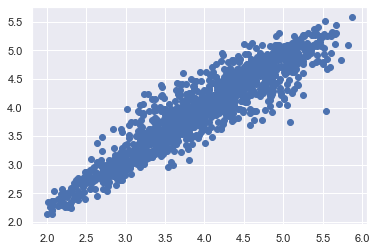

In [260]:
plt.scatter(y1,model.predict(X1))

<AxesSubplot:>

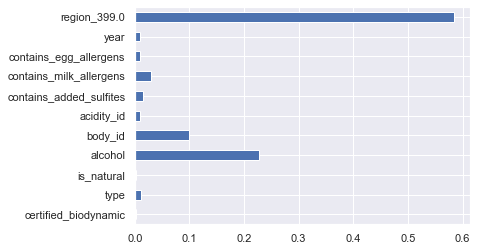

In [261]:
pd.Series({X.columns[i]:model.feature_importances_[i] for i in range(X1.shape[1])}).plot.barh()

In [252]:
from pycaret.regression import *

In [271]:
X1['y']=y.map(np.log)
X1['region_id']=X1['region_id'].astype(str)

In [272]:
data=setup(data=X1, target='y')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,805
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1484, 12)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [273]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,0.3885,0.2457,0.4948,0.6368,0.1029,0.1037,0.8464
1,Gradient Boosting Regressor,0.3976,0.2545,0.5034,0.6236,0.1052,0.1071,0.1626
2,Extreme Gradient Boosting,0.3948,0.2579,0.5073,0.6180,0.1051,0.1049,0.3880
3,Ridge Regression,0.4030,0.2587,0.5076,0.6176,0.1035,0.1059,0.0207
4,Bayesian Ridge,0.4034,0.2590,0.5079,0.6172,0.1035,0.1061,0.0355
5,Light Gradient Boosting Machine,0.4067,0.2670,0.5158,0.6052,0.1065,0.1077,0.0491
6,Random Forest,0.4221,0.2990,0.5457,0.5573,0.1125,0.1122,0.3228
7,Orthogonal Matching Pursuit,0.4430,0.3140,0.5591,0.5367,0.1162,0.1187,0.0118
8,K Neighbors Regressor,0.4393,0.3142,0.5594,0.5352,0.1162,0.1178,0.0154
9,AdaBoost Regressor,0.4632,0.3414,0.5837,0.4935,0.1249,0.1294,0.0849


In [275]:
model=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4002,0.2446,0.4945,0.5900,0.1049,0.1093
1,0.3870,0.2386,0.4885,0.6687,0.1024,0.1043
2,0.3837,0.2574,0.5074,0.6697,0.1049,0.0980
3,0.3869,0.2303,0.4799,0.6111,0.0962,0.0969
4,0.4031,0.2580,0.5080,0.6085,0.1066,0.1084
5,0.3485,0.1945,0.4411,0.6594,0.0923,0.0916
6,0.4307,0.3139,0.5602,0.6062,0.1152,0.1149
7,0.3862,0.2279,0.4773,0.6451,0.1024,0.1074
8,0.3869,0.2431,0.4930,0.6584,0.1039,0.1080
9,0.3718,0.2482,0.4982,0.6505,0.1007,0.0980


In [276]:
tuned_xgb=tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4115,0.2456,0.4956,0.5883,0.1053,0.1125
1,0.4016,0.2468,0.4967,0.6574,0.1041,0.1079
2,0.3743,0.2538,0.5038,0.6743,0.1050,0.0952
3,0.3917,0.2259,0.4753,0.6186,0.0950,0.0983
4,0.4033,0.2606,0.5105,0.6045,0.1063,0.1076
5,0.3523,0.1942,0.4406,0.6600,0.0906,0.0910
6,0.4414,0.3249,0.5700,0.5924,0.1183,0.1196
7,0.3898,0.2271,0.4766,0.6462,0.1029,0.1088
8,0.3974,0.2519,0.5019,0.6460,0.1057,0.1102
9,0.3641,0.2381,0.4880,0.6648,0.0983,0.0962


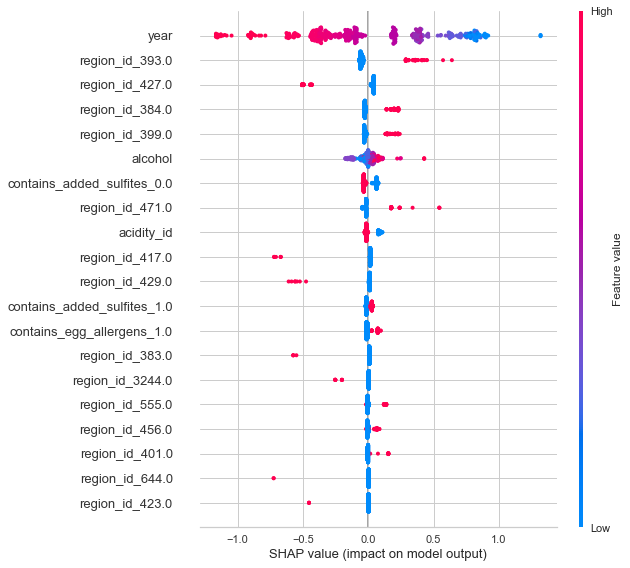

In [279]:
interpret_model(tuned_xgb)

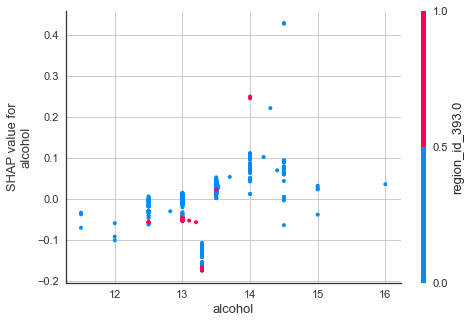

In [283]:
interpret_model(tuned_xgb, plot='correlation')

In [286]:
interpret_model(tuned_xgb, plot='reason')

# Pycaret Classification

In [1]:
from pycaret.classification import *

In [2]:
from pycaret.datasets import get_data

In [4]:
data=get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [6]:
data.shape

(24000, 24)

In [7]:
exp_clf101 = setup(data = data, target = 'default', session_id=123)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(24000, 24)"
4,Missing Values,False
5,Numeric Features,14
6,Categorical Features,9
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Linear Discriminant Analysis,0.8231,0.7691,0.3877,0.6728,0.4915,0.3939,0.4159,0.5612
1,Ridge Classifier,0.8223,0.0000,0.3667,0.6822,0.4766,0.3813,0.4081,0.0744
2,Gradient Boosting Classifier,0.8205,0.7828,0.3697,0.6705,0.4762,0.3788,0.4034,8.2566
3,Light Gradient Boosting Machine,0.8197,0.7797,0.3823,0.6583,0.4832,0.3834,0.4044,0.4679
4,CatBoost Classifier,0.8187,0.7808,0.3748,0.6571,0.4770,0.3773,0.3992,12.0065
5,Ada Boost Classifier,0.8174,0.7737,0.3433,0.6693,0.4536,0.3575,0.3863,1.8758
6,Extreme Gradient Boosting,0.8103,0.7593,0.3648,0.6210,0.4593,0.3537,0.3723,7.5664
7,Extra Trees Classifier,0.8034,0.7382,0.3686,0.5894,0.4531,0.3411,0.3552,1.6697
8,Random Forest Classifier,0.8033,0.7290,0.3169,0.6057,0.4153,0.3110,0.3349,0.2475
9,Quadratic Discriminant Analysis,0.7908,0.7376,0.1222,0.6378,0.2044,0.1443,0.2109,0.2180


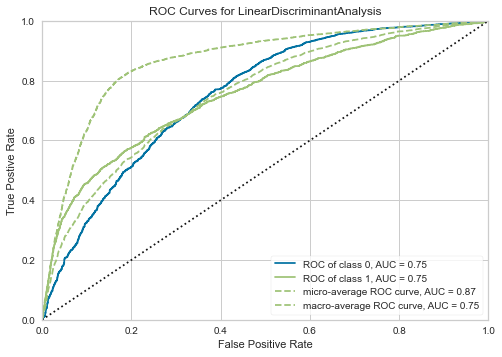

In [9]:
plot_model(best, plot='auc')

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
X=data.drop('default',axis=1)
y=data.default

In [16]:
mod=RandomForestClassifier()

In [17]:
mod.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
mod.predict(X)

array([1, 0, 0, ..., 1, 1, 1])

In [21]:
import numpy as np
np.where(mod.predict_proba(X)[:,1]>0.7,1,0)

array([1, 0, 0, ..., 1, 0, 0])